<a href="https://www.kaggle.com/code/deepakkaura/audit-risk-ml-will-help?scriptVersionId=134462218" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***Audit Risk : Identify Fraudulent Firms with ML***



### *By Deepak Kaura*

### **Problem Statement and about dataset : -**


The goal of the dataset is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors.

The information about the sectors and the counts of firms are listed respectively as

* Irrigation (114),

* Public Health (77),

* Buildings and Roads (82),

* Forest (70),

* Corporate (47),

* Animal Husbandry (95),

* Communication (1),

* Electrical (4),

* Land (5),

* Science and Technology (3),

* Tourism (1),

* Fisheries (41),

* Industries (37),

* Agriculture (200).

This research work is a case study of an external government audit company which is also the external auditor of government firms of India. During audit-planning, auditors examine the business of different government offices but the target to visit the offices with very-high likelihood and significance of misstatements. This is calculated by assessing the risk relevant to the financial reporting goals (Houston, Peters, and Pratt 1999). The three main objective of the study are as follow:

* To understand the audit risk analysis work-flow of the company by in-depth interview with the audit employees, and to propose a decision-making framework for risk assessment of firms during audit planning.

* To examine the present and historical risk factors for determining the Risk Audit Score for 777 target firms, to implement the Particle Swarm Optimization (PSO) algorithm to rank examined risk factors, and evaluating the Risk Audit Class (Fraud and No-Fraud) of nominated firms.

* To examine the present and historical risk factors for determining the Risk Audit Score for 777 target firms, to implement the Particle Swarm Optimization (PSO) algorithm to rank examined risk factors, and evaluating the Risk Audit Class (Fraud and No-Fraud) of nominated firms.

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## **Loading and Reading the dataset**

In [4]:
df = pd.read_csv('/kaggle/input/audit-data/audit_data.csv')

df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


### **Checking missing values**

In [ ]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

### **Visualizing the Target variable**

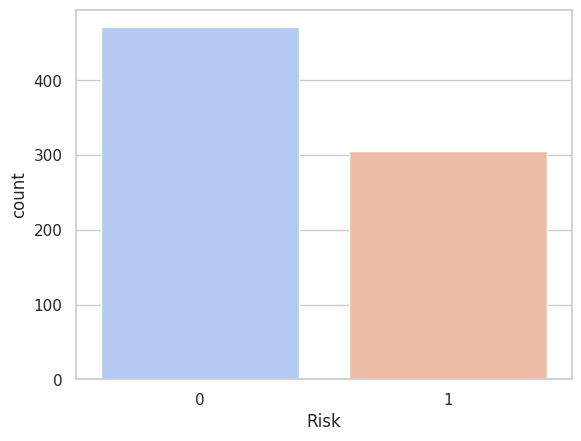

In [ ]:
ax = sns.countplot(x="Risk", data=df, palette = "coolwarm")
plt.show()

### **Take a copy of dataframe**

In [5]:
df_ml = df.copy()

### **Handling the missing values**

In [6]:
# Fill missing value
df_ml['Money_Value'] = df_ml['Money_Value'].fillna(df_ml['Money_Value'].mean())

#### **One-Hot encoding**

In [7]:
# One-hot encode the LOCATION_ID column
location_dummies = pd.get_dummies(df_ml['LOCATION_ID'], prefix='location')

df_ml = pd.concat([df_ml, location_dummies], axis=1)

df_ml = df_ml.drop('LOCATION_ID', axis=1)

### **Train-Test Split and Preprocessing**

In [8]:
# Split df into X and y
y = df_ml['Risk']
X = df_ml.drop('Risk', axis=1)

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [10]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

#### ***Model Prediction and show model's performance in visualization form***

Now we are ready to train a model and predict the required solution. Our problem is a classification problem (using machine learning's top classification models) : -

* Decision Tree Classifier

* Random Forest Classifier

* Logistic Regression

* XGBoost Classifier

* Support Vector Machine Classifier

* Neural Network (MLPClassifier)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

dt_model=DecisionTreeClassifier().fit(X_train,y_train)

dt_pred= dt_model.predict(X_test)
dt_score = accuracy_score(y_test,dt_pred)
print('Decision Tree accuracy score:', dt_score)

Decision Tree accuracy score: 1.0


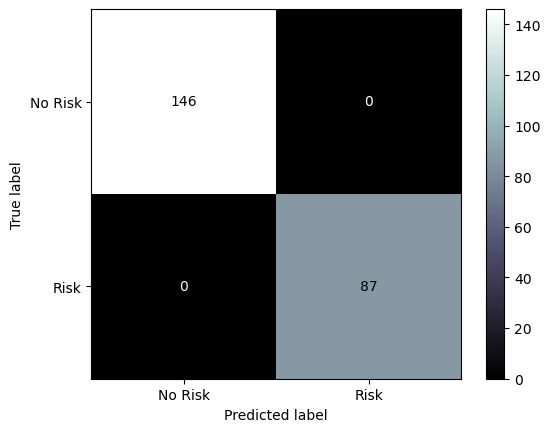

In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_dt = confusion_matrix(y_test, dt_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Risk', 'Risk'])

cm_display.plot(cmap='bone')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_model = rfc.fit(X_train, y_train)

rfc_pred= rfc_model.predict(X_test)

rfc_score = accuracy_score(y_test , rfc_pred)
print('Random Forest accuracy score:', rfc_score)

Random Forest accuracy score: 1.0


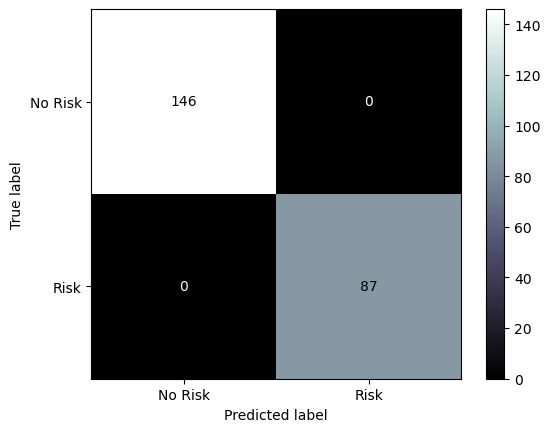

In [14]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_rfc = confusion_matrix(y_test, rfc_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=['No Risk', 'Risk'])

cm_display.plot(cmap='bone')
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression().fit(X_train,y_train)

lr_pred = lr_model.predict(X_test)

lr_score = accuracy_score(y_test , lr_pred)
print('Logistic Regression accuracy score:', lr_score)

Logistic Regression accuracy score: 0.9871244635193133


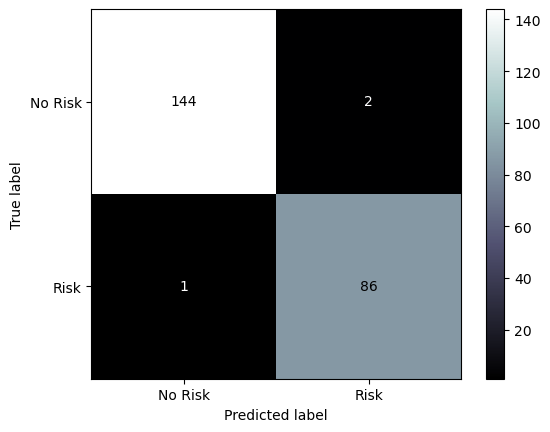

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, lr_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Risk', 'Risk'])

cm_display.plot(cmap='bone')
plt.show()

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier().fit(X_train,y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_score = accuracy_score(y_test , xgb_pred)
print('XGBoost accuracy score:', xgb_score)

XGBoost accuracy score: 1.0


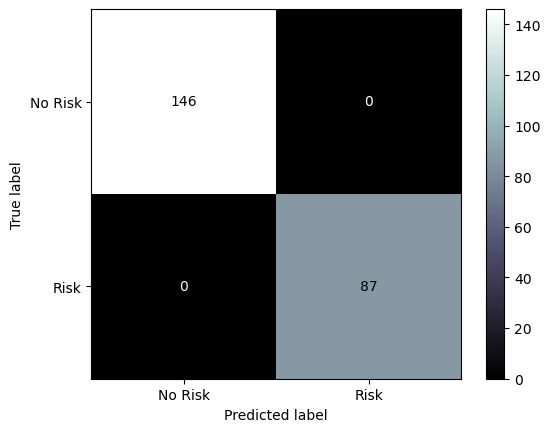

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_xgb = confusion_matrix(y_test, xgb_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Risk', 'Risk'])

cm_display.plot(cmap='bone')
plt.show()

In [19]:
from sklearn import svm
from sklearn.metrics import classification_report

# Create an SVM model
svm_model = svm.SVC(kernel='linear').fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Calculate the accuracy score
svm_score = accuracy_score(y_test, svm_pred)

print('SVM accuracy score:', svm_score)

SVM accuracy score: 0.9828326180257511


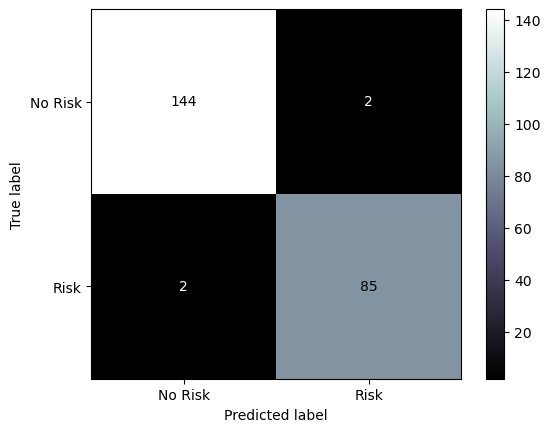

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, svm_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['No Risk', 'Risk'])

cm_display.plot(cmap='bone')
plt.show()

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Create an Neural Network model
nn_model = MLPClassifier().fit(X_train, y_train)

# Make predictions
nn_pred = nn_model.predict(X_test)

# Calculate the accuracy score
nn_score = accuracy_score(y_test, nn_pred)

print('Neural Network accuracy score:', nn_score)

Neural Network accuracy score: 0.9871244635193133


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


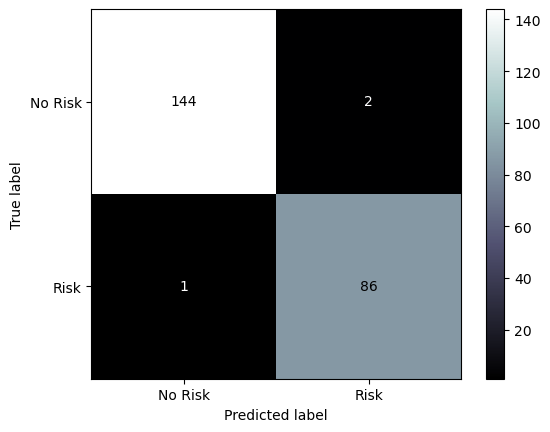

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_nn = confusion_matrix(y_test, nn_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No Risk', 'Risk'])

cm_display.plot(cmap='bone')
plt.show()

#### **Clubbing all models results into dataframe**

In [23]:
models = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Decision Tree','XGBoost Classifier', 'Support Vector Machine','Neural Network'],
                       'Score': [lr_score*100 , rfc_score*100, dt_score*100, xgb_score*100, svm_score*100, nn_score*100]}).round(2)

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,100.00
2,Decision Tree,100.00
3,XGBoost Classifier,100.00
0,Logistic Regression,98.71
5,Neural Network,98.71
4,Support Vector Machine,98.28


In [24]:
# Define the text for each model (including model name and score)
models['Text'] = [f'{model}: {score:.2f}' for model, score in zip(models['Model'], models['Score'])]

# Create a horizontal bar plot
fig = px.bar(models, y="Model", x="Score", color="Model", text='Text', orientation='h', title="Comparing ML Algorithms")

# Set the x-axis label and its size
fig.update_layout(xaxis_title="Accuracy", xaxis_title_font_size=13)

# Set the y-axis label and its size
fig.update_layout(yaxis_title="Model", yaxis_title_font_size=14)

# Show the plot
fig.show()

***From above graph we can see that Random Forest, Decision Tree and XGBoost Classifier all have 100% accuracy (perfect models)***

#### **False positive ("Risk" and predicted value "No Risk") Type-1 error**
let's visualize this to check that which model has lesser number of Type-1 error.

In [25]:
models1 = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','XGBoost Classifier','Support Vector Machine','Neural Network'],
                       'False Positives': [cm_dt[0,1],cm_rfc[0,1],cm_lr[0,1],cm_xgb[0,1], cm_svm[0,1], cm_nn[0,1]]})

models1.sort_values(by='False Positives', ascending=False)

,Model,False Positives
2,Logistic Regression,2
4,Support Vector Machine,2
5,Neural Network,2
0,Decision Tree,0
1,Random Forest,0
3,XGBoost Classifier,0


In [26]:
# Sort the DataFrame by 'False Positives' column in descending order
models1 = models1.sort_values(by='False Positives', ascending=False)

# Define the text for each model (including model name and score)
models1['Text'] = [f'{model}: {score}' for model, score in zip(models1['Model'], models1['False Positives'])]

# Create a horizontal bar plot
fig = px.bar(models1, y="Model", x="False Positives", color="Model", text='Text', orientation='h', title="Comparing ML Algorithms")

# Set the x-axis label and its size
fig.update_layout(xaxis_title="False Positives", xaxis_title_font_size=13)

# Set the y-axis label and its size
fig.update_layout(yaxis_title="Model", yaxis_title_font_size=14)

# Show the plot
fig.show()

***From above we can observe that our perfect models perform spectacular***

#### **False negative ("No Risk" and predicted value "Risk") Type-2 error**
let's visualize this to check that which model has lesser number of Type-2 error.

In [27]:
models2 = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','XGBoost Classifier','Support Vector Machine','Neural Network'],
                       'False negative': [cm_dt[1,0],cm_rfc[1,0],cm_lr[1,0],cm_xgb[1,0], cm_svm[1,0], cm_nn[1,0]]})

models2.sort_values(by='False negative', ascending=False)

,Model,False negative
4,Support Vector Machine,2
2,Logistic Regression,1
5,Neural Network,1
0,Decision Tree,0
1,Random Forest,0
3,XGBoost Classifier,0


In [28]:
# Define the text for each model (including model name and score)
models2['Text'] = [f'{model}: {score}' for model, score in zip(models2['Model'], models2['False negative'])]

# Create a horizontal bar plot
fig = px.bar(models2, y="Model", x="False negative", color="Model", text='Text', orientation='h', title="Comparing ML Algorithms")

# Set the x-axis label and its size
fig.update_layout(xaxis_title="False Negative", xaxis_title_font_size=13)

# Set the y-axis label and its size
fig.update_layout(yaxis_title="Model", yaxis_title_font_size=14)

# Show the plot
fig.show()

***From above we can observe that again our perfect models perform awesome***

#### **True negative ("Risk" and predicted value "Risk") True prediction**
let's visualize this to observe that which alogrithm has predicted rightly Risk

In [29]:
models3 = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','XGBoost Classifier','Support Vector Machine','Neural Network'],
                       'True negative': [cm_dt[1,1],cm_rfc[1,1],cm_lr[1,1],cm_xgb[1,1], cm_svm[1,1], cm_nn[1,1]]})

models3.sort_values(by='True negative', ascending=False)

,Model,True negative
0,Decision Tree,87
1,Random Forest,87
3,XGBoost Classifier,87
2,Logistic Regression,86
5,Neural Network,86
4,Support Vector Machine,85


In [30]:
# Define the text for each model (including model name and score)
models3['Text'] = [f'{model}: {score}' for model, score in zip(models3['Model'], models3['True negative'])]

# Create a horizontal bar plot
fig = px.bar(models3, y="Model", x="True negative", color="Model", text='Text', orientation='h', title="Comparing ML Algorithms")

# Set the x-axis label and its size
fig.update_layout(xaxis_title="True Negative", xaxis_title_font_size=13)

# Set the y-axis label and its size
fig.update_layout(yaxis_title="Model", yaxis_title_font_size=14)

# Show the plot
fig.show()

***From above we observed that all perform well but our perfect models are best ones***

## ***Visualizing Feature Importance from our perfect models (anyone)***

In [31]:
# Get the feature importances and indices
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create a Plotly figure
fig = px.bar(x=names, y=importances[indices], title="Feature Importance")

# Set the x-axis labels to rotate by 90 degrees
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()